In [81]:
import scanpy as sc

adata = sc.datasets.pbmc3k_processed()

# Run leiden clustering for different resolutions
for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

In [82]:
from pyclustree import clustree

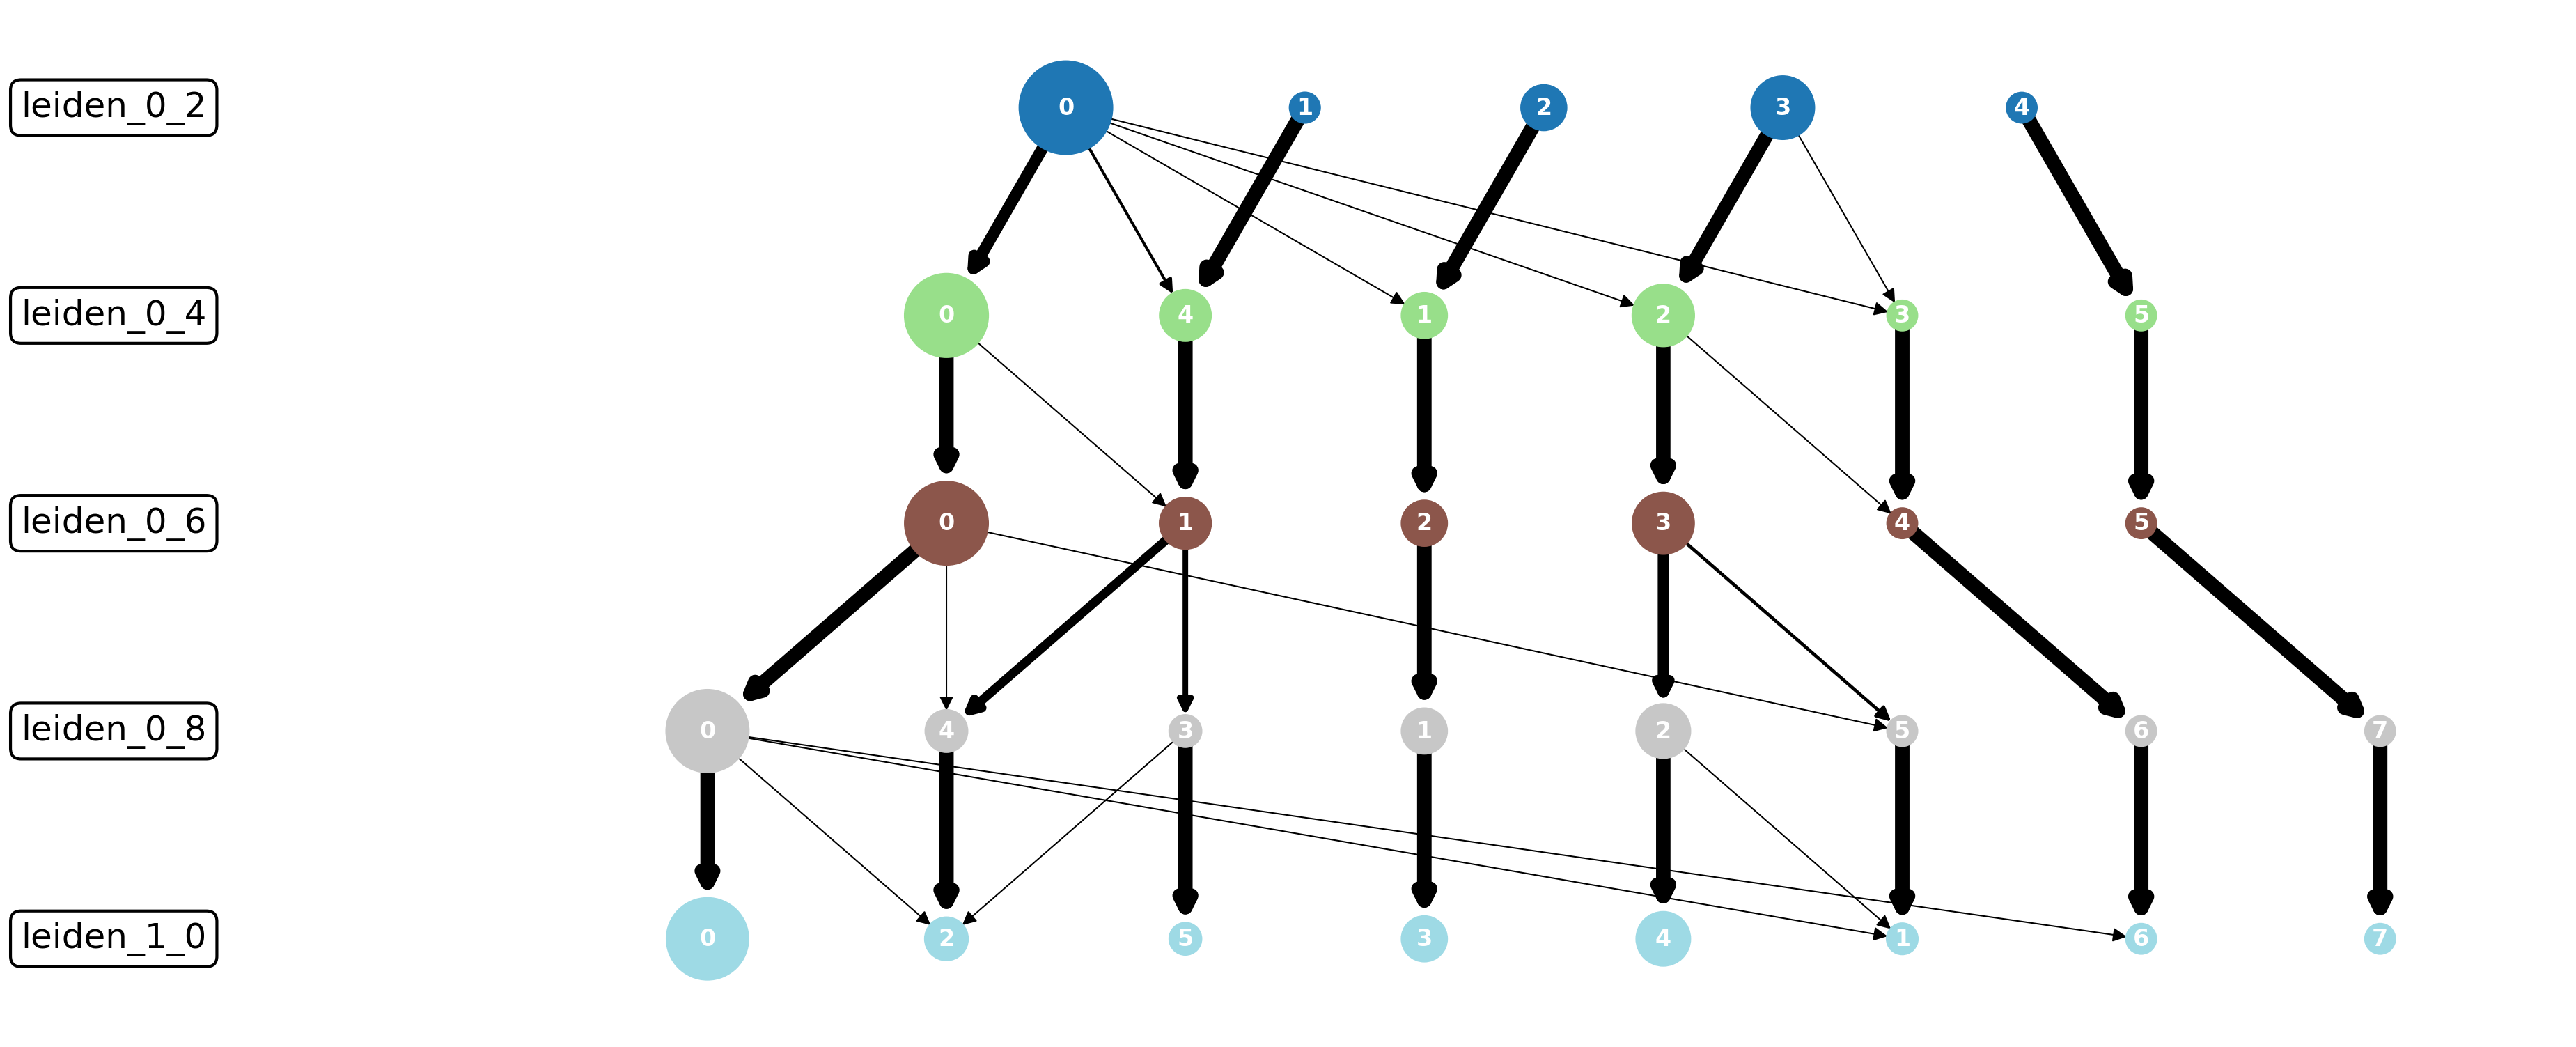

In [83]:
# Create a clustree visualization
cluster_keys = [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]]
fig = clustree(
    adata,
    cluster_keys=cluster_keys,
    transition_plot="sankey",
)

In [1]:
# df_cluster_assignments

In [85]:
import pandas as pd

df_cluster_assignments = adata.obs[cluster_keys]

transition_matrices = [
    pd.crosstab(
        df_cluster_assignments[cluster_keys[i]],
        df_cluster_assignments[cluster_keys[i + 1]],
    )
    for i in range(len(cluster_keys) - 1)
]

In [86]:
# for key in cluster_keys:
#     df_cluster_assignments.loc[:, key] = df_cluster_assignments[[key]].map(lambda x: f"{key}-" + x)

In [87]:
df_cluster_assignments

,leiden_0_2,leiden_0_4,leiden_0_6,leiden_0_8,leiden_1_0
index,,,,,
AAACATACAACCAC-1,0,0,0,0,0
AAACATTGAGCTAC-1,2,1,2,1,3
AAACATTGATCAGC-1,0,0,0,0,0
AAACCGTGCTTCCG-1,3,2,3,2,4
AAACCGTGTATGCG-1,1,4,1,3,5
...,...,...,...,...,...
TTTCGAACTCTCAT-1,3,2,3,2,4
TTTCTACTGAGGCA-1,2,1,2,1,3
TTTCTACTTCCTCG-1,2,1,2,1,3


In [88]:
from matplotlib_sankey import from_matrix

all_matrices = []
for i in range(len(cluster_keys) - 1):
    all_matrices.append(
        from_matrix(
            transition_matrices[i].to_numpy(),
            source_indicies=transition_matrices[i].index.tolist(),
            target_indicies=transition_matrices[i].columns.tolist(),
        )
    )

<Axes: title={'center': 'Clustree of PBMC68k'}>

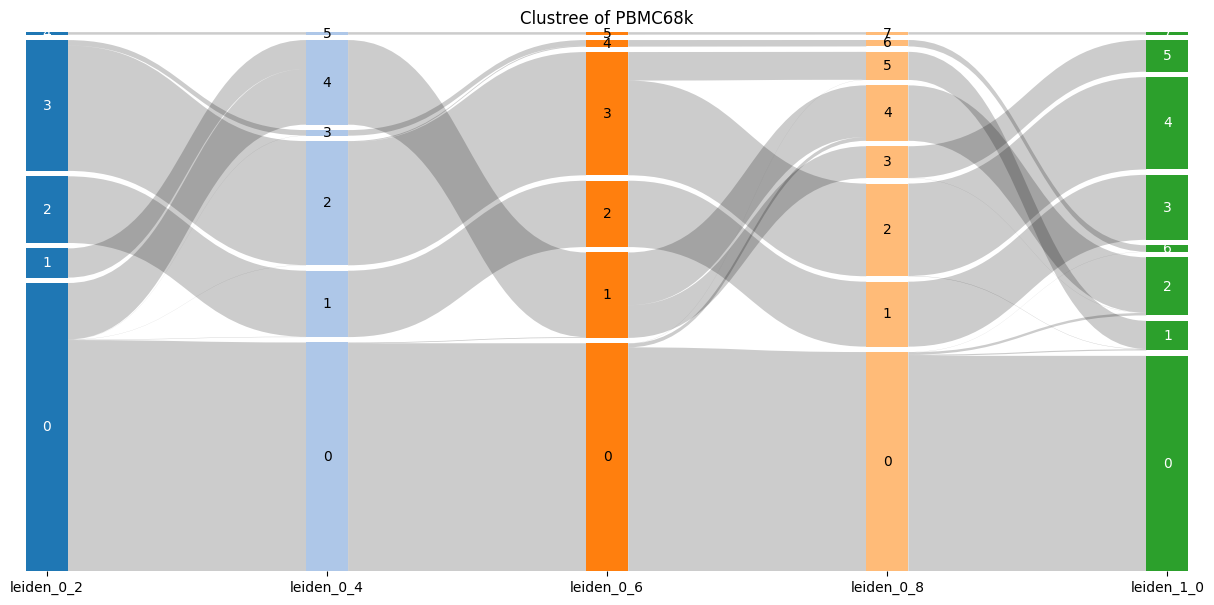

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_sankey import sankey
from matplotlib_sankey._colors import colormap_to_list

fig, ax = plt.subplots(figsize=(15, 7))
sankey(
    all_matrices,
    color=colormap_to_list(name="tab20", num=5),
    ax=ax,
    spacing=0.01,
    column_labels=cluster_keys,
    annotate_columns="index",
    title="Clustree of PBMC68k",
)

In [ ]:
import numpy as np

np.float32(0.1490706)

In [ ]:
node_expr: dict[str, dict[str, float]] = {}

for key in cluster_keys:
    node_expr[key] = {}
    for cluster_key_name in adata.obs["leiden_0_2"].unique():
        node_expr[key][cluster_key_name] = np.mean(
            adata[(adata.obs[key] == cluster_key_name), ["TNFRSF4"]].X,
            axis=0,
        )[0]

In [139]:
np.array([list(v.values()) for v in node_expr.values()]).flatten().max()

np.float32(0.22118157)